In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Linear Regression

Write about Linear Regression and equations

## The Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

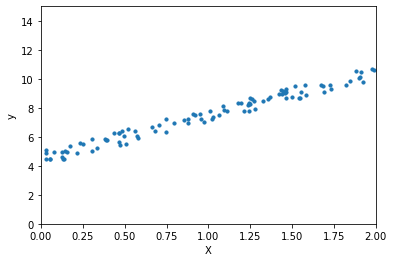

In [3]:
plt.scatter(X, y, s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])

plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.55189515],
       [2.96827582]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55189515],
       [10.48844679]])

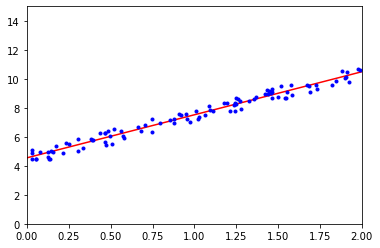

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55189515]), array([[2.96827582]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.55189515],
       [10.48844679]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.55189515],
       [2.96827582]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.55189515],
       [2.96827582]])

## Gradient Descent

Write about Gradient Descent

#### Barch Gradient Descent

In [13]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m=100

In [14]:
theta = np.random.randn(2, 1)

In [15]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.55189515],
       [2.96827582]])

#### Stochastic Gradient Descent

In [17]:
n_epochs = 50
t0, t1 = 5, 50

In [18]:
def learning_schedule(t):
    return t0 / (t + t1)

In [19]:
theta = np.random.rand(2,1)

In [20]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.54046689],
       [2.95894323]])

In [22]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.54234063]), array([2.98731801]))

#### Mini-batch Gradient Descet

## Polynomial Regression

In [24]:
m=100
X=6 * np.random.rand(m, 1) - 3
y=0.5 * X**2 + X + 2 + np.random.randn(m, 1)

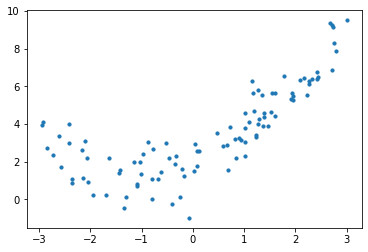

In [27]:
plt.scatter(X, y, s=10);

In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.59599095])

In [30]:
X_poly[0]

array([0.59599095, 0.35520522])

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94981305]), array([[1.03879854, 0.47713614]]))

## Learning Curves

In [44]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")
    plt.axis([0, 80, 0, 3])

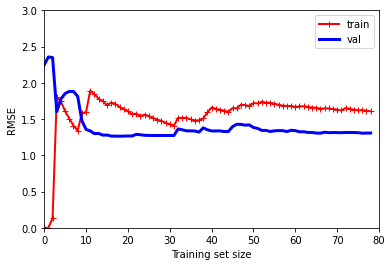

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

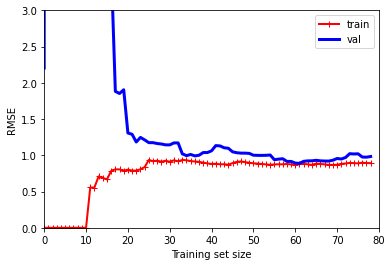

In [46]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

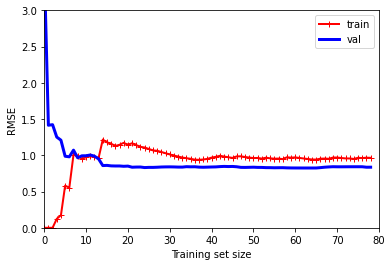

In [47]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)